# Prediction of the Crypto Market Cap Growth

This notebook serves as an analysis tool for the Crypto market. It explores a 24-hour updating [dataset](https://www.kaggle.com/datasets/adrianjuliusaluoch/crypto-and-stock-market-data-for-financial-analysis) to approximate the deviation in exchange and understand the market growth trajectory.

# Project Overview

- **Data Analysis**: Analyse the dataset, display graphs to understand relationships and split the data for training and testing.
- **Model training and evaluation**: Train the model on the training data.
- **Cross validation**: test the model using Time Series Cross-validation and visualise its performance on new data.
- **Visualisation**: visualise the resulsts across testings to compare the predictions's accuracy.

# Polynomial Regression

## Recap: what is a polynomial?

In mathematics, a polynomial is a mathematical expression consisting of indeterminates (also called variables) and coefficients, that involves only the operations of addition, subtraction, multiplication and exponentiation to nonnegative integer powers, and has a finite number of terms. An example of a polynomial of a single indeterminate $x$ is $P(X)=x²-4x+7$. With three indeterminates: $P(X)=x^{3}+2xyz^{2}-yz+1$.

The order/degree of a polynomial is the value of its biggest power: A polynomial of order 2 can constist of at most power 2 variables: $P(X)=x + 4x²$. It's not necessary for all the powers of $x$ to be present. We can have a singular (not very useful) variable polynomial ($\alpha * x²$) and still be called an order 2 polynomial.

## What about Polynomial Regression?

In statistics, it is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as a polynomial $y=P(X)$. Therefore, the model won't be able to fit a non linear data as it will fail to understand the relationships between data points resulting from $n$-power polynomials.

At a mathematical level, a ploynomial regression should look like this:

$$y = \beta₀ + \beta₁x + \beta₂x² + \beta₃x³ + … + \betaₙxⁿ + \epsilon$$

Where:
- $y$ -> Dependent variable (what you’re predicting).
- $x$ -> Independent variable (your input).
- $\beta₀, \beta₁, \beta₂, …, \betaₙ$ -> Coefficients for each degree of $x$.
- $x², x³, …, xⁿ$: higher-order terms that add more flexibility.
- $\epsilon$ -> The error/risidual term from calculations.

## Key terms:

* **Outlier**: An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

* **Underfitting**: When your model is too simple to capture the underlying pattern in the data. Imagine trying to fit a straight line to a dataset that clearly follows a curve. Linear regression, while simple, can suffer from underfitting when the relationship isn’t linear.

* **Overfitting**: It occurs when your model is too complex, capturing every tiny fluctuation in the data, including noise. This might make your training performance look stellar, but when new data comes along, the model falls apart.

## Comparison with Linear model

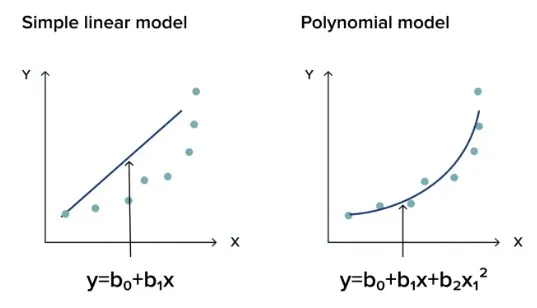
<br>

At its core, polynomial regression is an extension of linear regression. But some differences are present making it more suitable for real world scenarios:

|                     	| Polynomial Regression           	| Linear Regression                                	|
|-----------------------|-----------------------------------|---------------------------------------------------|
| Type of data to use 	| Unstable data                   	| Linear data. Assumes a constant rate of change.  	|
| Graph shape         	| Curves                          	| Straight line                                    	|
| Complexity          	| Complex to read and manipulate. 	| Easier to read, understand and lighter to compute |


## Use-cases

Thanks to its flexibility, polynomial regression can easily handle real world data. A modal fit for constant change with non linear progression.

Polynomial regression finds its way in various real world scenarios, including but not limited to:
- **Finance**: modeling stock trends.
- **Health-care**: predicting growth patterns.
- **Manufacturing**: analysing system performance curves.

## Pros and pitfalls
Pros:
- **Flexibility**: Can model a wide range of relationships.
- **Better Fit**: Can capture non-linear trends in the data.
- **Varied applicability**: Thanks to its flexible nature, we can explore a wide range of fields with volatile behavior.

Pitfalls:
- **Computational Complexity**: As the degree of the polynomial increases, so does the computational cost.
- **Overfitting & Underfitting**: Prone to overfitting with higher-degree polynomials and underfitting low-degrees.
- **Sensitivity to Outliers**: More sensitive to outliers compared to linear regression.


# Setup steps

# Data Analysis

# Cross validation